#### Feature Engineering  

Dataset: 

- _orders_activity_day.csv_
- _orders_activity_frequency.csv_
- _orders_activity_time.csv_

- _product_preference.csv_
- _product_purchase_quantity.csv_
- _produc_reorder_rate_by_position.csv_
- _product_repurchase.csv_
- _product_user_segment_repurchase_rate.csv_

Author: Luis Sergio Pastrana Lemus  
Date: 2025-05-05

## __1. Libraries__

In [1]:
from IPython.display import display, HTML
import os
import pandas as pd
from pathlib import Path
import sys

# Define project root dynamically, gets the current directory from whick the notebook belongs and moves one level upper
project_root = Path.cwd().parent

# Add src to sys.path if it is not already
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import function directly (more controlled than import *)
from src import *

## __2. Path to Data file__

In [2]:
# Build route to data file and upload
data_file_path = project_root / "data" / "processed" / "order_activity"

df_orders_activity_day = load_dataset_from_csv(data_file_path, "orders_activity_day.csv", sep=',', header='infer')
df_orders_activity_frequency = load_dataset_from_csv(data_file_path, "orders_activity_frequency.csv", sep=',', header='infer')
df_orders_activity_time = load_dataset_from_csv(data_file_path, "orders_activity_time.csv", sep=',', header='infer')

data_file_path = project_root / "data" / "processed" / "product_activity"

df_product_preference = load_dataset_from_csv(data_file_path, "product_preference.csv", sep=',', header='infer')
df_product_purchase_quantity = load_dataset_from_csv(data_file_path, "product_purchase_quantity.csv", sep=',', header='infer')
df_product_reorder_rate_by_position = load_dataset_from_csv(data_file_path, "product_reorder_rate_by_position.csv", sep=',', header='infer')
df_product_repurchase = load_dataset_from_csv(data_file_path, "product_repurchase.csv", sep=',', header='infer')
df_product_user_segment_repurchase_rate = load_dataset_from_csv(data_file_path, "product_user_segment_repurchase_rate.csv", sep=',', header='infer')


## __3. Exploratory Data Analysis__

### 3.1  Descriptive Statistics

<table>
  <thead>
    <tr>
      <th>CV (%)</th>
      <th>Interpretation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><small><strong>0–10%</strong></small></td>
      <td><small><strong>Very low</strong> variability → <strong>very reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>10–20%</strong></small></td>
      <td><small><strong>Moderate</strong> variability → <strong>reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>20–30%</strong></small></td>
      <td><small><strong>Considerable</strong> variability → <strong>some what skewed</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>>30%</strong></small></td>
      <td><small>High<strong> variability</strong> → <strong>prefer</strong> Median</small></td>
    </tr>
  </tbody>
</table>


#### 3.1.1 Descriptive statistics for Orders Activity per day

In [3]:
df_orders_activity_day.describe()

,total_orders
count,7.000000
mean,68421.714286
std,10247.547409
min,59810.000000
25%,61773.000000
50%,63488.000000
75%,74009.000000
max,84090.000000


In [5]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_orders_activity_day, 'total_orders')

In [6]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_orders_activity_day, 'total_orders', bound='both')

(Empty DataFrame
 Columns: [order_dow, total_orders]
 Index: [],
 Empty DataFrame
 Columns: [order_dow, total_orders]
 Index: [])

#### 3.1.2 Descriptive statistics for Orders Activity per Time

In [7]:
df_orders_activity_time.describe()

,order_hour_of_day,total_orders
count,24.000000,24.000000
mean,11.500000,19956.333333
std,7.071068,15984.910152
min,0.000000,765.000000
25%,5.750000,3956.250000
50%,11.500000,17085.500000
75%,17.250000,38053.500000
max,23.000000,40578.000000


In [8]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_orders_activity_time, 'total_orders')

In [10]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_orders_activity_time, 'total_orders', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [order_hour_of_day, total_orders]
 Index: [],
 Empty DataFrame
 Columns: [order_hour_of_day, total_orders]
 Index: [])

#### 3.1.3 Descriptive statistics for Orders Activity Frequency

In [11]:
df_orders_activity_frequency.describe()

,avg_frequency_order
count,157437.000000
mean,12.852281
std,8.876483
min,0.000000
25%,6.000000
50%,10.800000
75%,18.333333
max,30.000000


In [12]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_orders_activity_frequency, 'avg_frequency_order')

In [14]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_orders_activity_frequency, 'avg_frequency_order', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [avg_frequency_order]
 Index: [],
 Empty DataFrame
 Columns: [avg_frequency_order]
 Index: [])

#### 3.1.4 Descriptive statistics for Product Preference

In [19]:
df_product_preference.columns

Index(['product_id', 'first_add_count', 'product_name', 'total_orders', 'first_add_rate'], dtype='object')

In [20]:
df_product_preference[['first_add_count', 'total_orders', 'first_add_rate']].describe()

,first_add_count,total_orders,first_add_rate
count,26760.000000,26760.000000,26760.000000
mean,16.817862,165.842788,0.161904
std,142.684162,908.155887,0.170408
min,1.000000,1.000000,0.007519
25%,1.000000,11.000000,0.066918
50%,3.000000,31.000000,0.106779
75%,8.000000,96.000000,0.185185
max,15562.000000,66050.000000,1.000000


In [22]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_product_preference, 'first_add_count')

In [23]:
evaluate_central_trend(df_product_preference, 'total_orders')

In [24]:
evaluate_central_trend(df_product_preference, 'first_add_rate')

In [27]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_product_preference, 'first_add_count', bound='upper')

,product_id,first_add_count,product_name,total_orders,first_add_rate
0,24852,15562,banana,66050,0.235609
1,13176,11026,bag_of_orga...,53297,0.206878
2,27845,4363,organic_who...,19600,0.222602
3,21137,3946,organic_str...,37039,0.106536
4,47209,3390,organic_has...,29773,0.113862
...,...,...,...,...,...
3640,40287,19,original_po...,331,0.057402
3641,45246,19,high_protei...,198,0.095960
3642,5422,19,deluxe_ever...,354,0.053672
3643,10333,19,rice_krispi...,300,0.063333


In [31]:
outlier_limit_bounds(df_product_preference, 'total_orders', bound='upper')

,product_id,first_add_count,product_name,total_orders,first_add_rate
0,24852,15562,banana,66050,0.235609
1,13176,11026,bag_of_orga...,53297,0.206878
2,27845,4363,organic_who...,19600,0.222602
3,21137,3946,organic_str...,37039,0.106536
4,47209,3390,organic_has...,29773,0.113862
...,...,...,...,...,...
9610,24142,5,broccoli_cuts,230,0.021739
10060,6891,5,apple_peach...,229,0.021834
11420,38248,4,vegetable_t...,279,0.014337
13806,6188,3,organic_app...,271,0.011070


In [32]:
outlier_limit_bounds(df_product_preference, 'first_add_rate', bound='upper')

,product_id,first_add_count,product_name,total_orders,first_add_rate
99,20940,475,organic_low...,1174,0.404600
167,22802,331,mineral_water,856,0.386682
185,40939,299,drinking_water,773,0.386805
190,45190,295,vodka,793,0.372005
396,35470,163,water_mineral,331,0.492447
...,...,...,...,...,...
26748,34074,1,16_bean_sou...,1,1.000000
26750,49685,1,en_croute_r...,2,0.500000
26752,49650,1,california_...,1,1.000000
26754,48,1,school_glue...,1,1.000000


#### 3.1.5 Descriptive statistics for Product Purchase Quantity

In [34]:
df_product_purchase_quantity['total_products'].describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: total_products, dtype: float64

In [35]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_product_purchase_quantity, 'total_products')

In [38]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_product_purchase_quantity, 'total_products', bound='upper')

,order_id,total_products
40,315,38
81,549,36
106,742,45
109,771,31
154,1115,33
...,...,...
449902,3420040,28
449963,3420499,29
449974,3420540,33
449993,3420673,28


#### 3.1.6 Descriptive statistics for Product reorder rate by position

In [39]:
df_product_reorder_rate_by_position.describe()

,add_to_cart_order,reorder_rate,product_count
count,64.000000,64.000000,64.000000
mean,32.500000,0.471099,71002.671875
std,18.618987,0.074356,120986.306624
min,1.000000,0.359649,75.000000
25%,16.750000,0.416452,643.500000
50%,32.500000,0.447151,7335.500000
75%,48.250000,0.497743,78626.250000
max,64.000000,0.678620,450046.000000


In [40]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_product_reorder_rate_by_position, 'add_to_cart_order')

In [41]:
evaluate_central_trend(df_product_reorder_rate_by_position, 'reorder_rate')

In [42]:
evaluate_central_trend(df_product_reorder_rate_by_position, 'product_count')

In [47]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_product_reorder_rate_by_position, 'add_to_cart_order', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [add_to_cart_order, reorder_rate, product_count]
 Index: [],
 Empty DataFrame
 Columns: [add_to_cart_order, reorder_rate, product_count]
 Index: [])

In [48]:
outlier_limit_bounds(df_product_reorder_rate_by_position, 'reorder_rate', bound='both')

(Empty DataFrame
 Columns: [add_to_cart_order, reorder_rate, product_count]
 Index: [],
    add_to_cart_order  reorder_rate  product_count
 0               1         0.678620         450046
 1               2         0.677059         428199
 2               3         0.658986         401907
 3               4         0.637511         372861)

In [51]:
outlier_limit_bounds(df_product_reorder_rate_by_position, 'product_count', bound='upper')

,add_to_cart_order,reorder_rate,product_count
0,1,0.678620,450046
1,2,0.677059,428199
2,3,0.658986,401907
3,4,0.637511,372861
4,5,0.617483,341807
5,6,0.602335,309884
6,7,0.586712,278186
7,8,0.574340,247364
8,9,0.562815,218825


#### 3.1.7 Descriptive statistics for Product Repurchase

In [54]:
df_product_repurchase[['times_reordered', 'total_orders', 'repurchase_rate']].describe()

,times_reordered,total_orders,repurchase_rate
count,45573.000000,45573.000000,45573.000000
mean,58.890966,99.730257,0.386707
std,526.943066,700.368341,0.272132
min,0.000000,1.000000,0.000000
25%,1.000000,3.000000,0.166667
50%,4.000000,10.000000,0.408163
75%,19.000000,42.000000,0.575758
max,55763.000000,66050.000000,1.000000


In [55]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_product_repurchase, 'times_reordered')

In [56]:
evaluate_central_trend(df_product_repurchase, 'total_orders')

In [57]:
evaluate_central_trend(df_product_repurchase, 'repurchase_rate')

In [61]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_product_repurchase, 'times_reordered', bound='upper')

,product_id,times_reordered,total_orders,repurchase_rate,product_name
0,1,158,280,0.564286,chocolate_s...
7,10,151,337,0.448071,sparkling_o...
17,23,56,147,0.380952,organic_tur...
19,25,199,295,0.674576,salted_cara...
22,28,60,117,0.512821,wheat_chex_...
...,...,...,...,...,...
45511,49628,448,671,0.667660,yoghurt_blu...
45522,49640,74,134,0.552239,sourdough_loaf
45536,49655,56,130,0.430769,apple_cider
45546,49667,127,236,0.538136,enchilada_w...


In [64]:
outlier_limit_bounds(df_product_repurchase, 'total_orders', bound='upper')

,product_id,times_reordered,total_orders,repurchase_rate,product_name
0,1,158,280,0.564286,chocolate_s...
7,10,151,337,0.448071,sparkling_o...
17,23,56,147,0.380952,organic_tur...
19,25,199,295,0.674576,salted_cara...
22,28,60,117,0.512821,wheat_chex_...
...,...,...,...,...,...
45522,49640,74,134,0.552239,sourdough_loaf
45536,49655,56,130,0.430769,apple_cider
45546,49667,127,236,0.538136,enchilada_w...
45558,49680,42,147,0.285714,all_natural...


In [68]:
outlier_limit_bounds(df_product_repurchase, 'repurchase_rate', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [product_id, times_reordered, total_orders, repurchase_rate, product_name]
 Index: [],
 Empty DataFrame
 Columns: [product_id, times_reordered, total_orders, repurchase_rate, product_name]
 Index: [])

#### 3.1.8 Descriptive statistics for Product User Segment Repurchase Rate

In [70]:
df_product_user_segment_repurchase_rate.describe()

,total_reorders,total_products,repurchase_rate
count,149626.000000,149626.000000,149626.000000
mean,17.936976,30.375784,0.494853
std,27.793625,35.873511,0.292685
min,0.000000,1.000000,0.000000
25%,2.000000,9.000000,0.272727
50%,8.000000,18.000000,0.500000
75%,21.000000,38.000000,0.724138
max,477.000000,580.000000,1.000000


In [72]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_product_user_segment_repurchase_rate, 'total_reorders')

In [73]:
evaluate_central_trend(df_product_user_segment_repurchase_rate, 'total_products')

In [74]:
evaluate_central_trend(df_product_user_segment_repurchase_rate, 'repurchase_rate')

In [77]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_product_user_segment_repurchase_rate, 'total_reorders', bound='upper')

,total_reorders,total_products,repurchase_rate,repurchase_segment
18,56,85,0.658824,High
34,51,72,0.708333,High
36,51,83,0.614458,High
67,89,115,0.773913,Very High
98,67,121,0.553719,High
...,...,...,...,...
149544,63,91,0.692308,High
149545,57,88,0.647727,High
149548,91,161,0.565217,High
149611,53,97,0.546392,High


In [78]:
outlier_limit_bounds(df_product_user_segment_repurchase_rate, 'total_products', bound='upper')

,total_reorders,total_products,repurchase_rate,repurchase_segment
18,56,85,0.658824,High
22,28,92,0.304348,Moderate
36,51,83,0.614458,High
67,89,115,0.773913,Very High
98,67,121,0.553719,High
...,...,...,...,...
149545,57,88,0.647727,High
149548,91,161,0.565217,High
149596,47,111,0.423423,Moderate
149611,53,97,0.546392,High


In [82]:
outlier_limit_bounds(df_product_user_segment_repurchase_rate, 'repurchase_rate', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [total_reorders, total_products, repurchase_rate, repurchase_segment]
 Index: [],
 Empty DataFrame
 Columns: [total_reorders, total_products, repurchase_rate, repurchase_segment]
 Index: [])

### 3.2 Data Visualization: Distributions and Relationships

#### 3.2.1 Covariance and Correlation Analysis 

##### 3.2.1.1 Covariance Matrix

In [83]:
# Covariance for product preference
df_product_preference[['first_add_count', 'total_orders', 'first_add_rate']].cov()

,first_add_count,total_orders,first_add_rate
first_add_count,20358.770068,116382.378779,-0.416872
total_orders,116382.378779,824747.115124,-10.033052
first_add_rate,-0.416872,-10.033052,0.029039


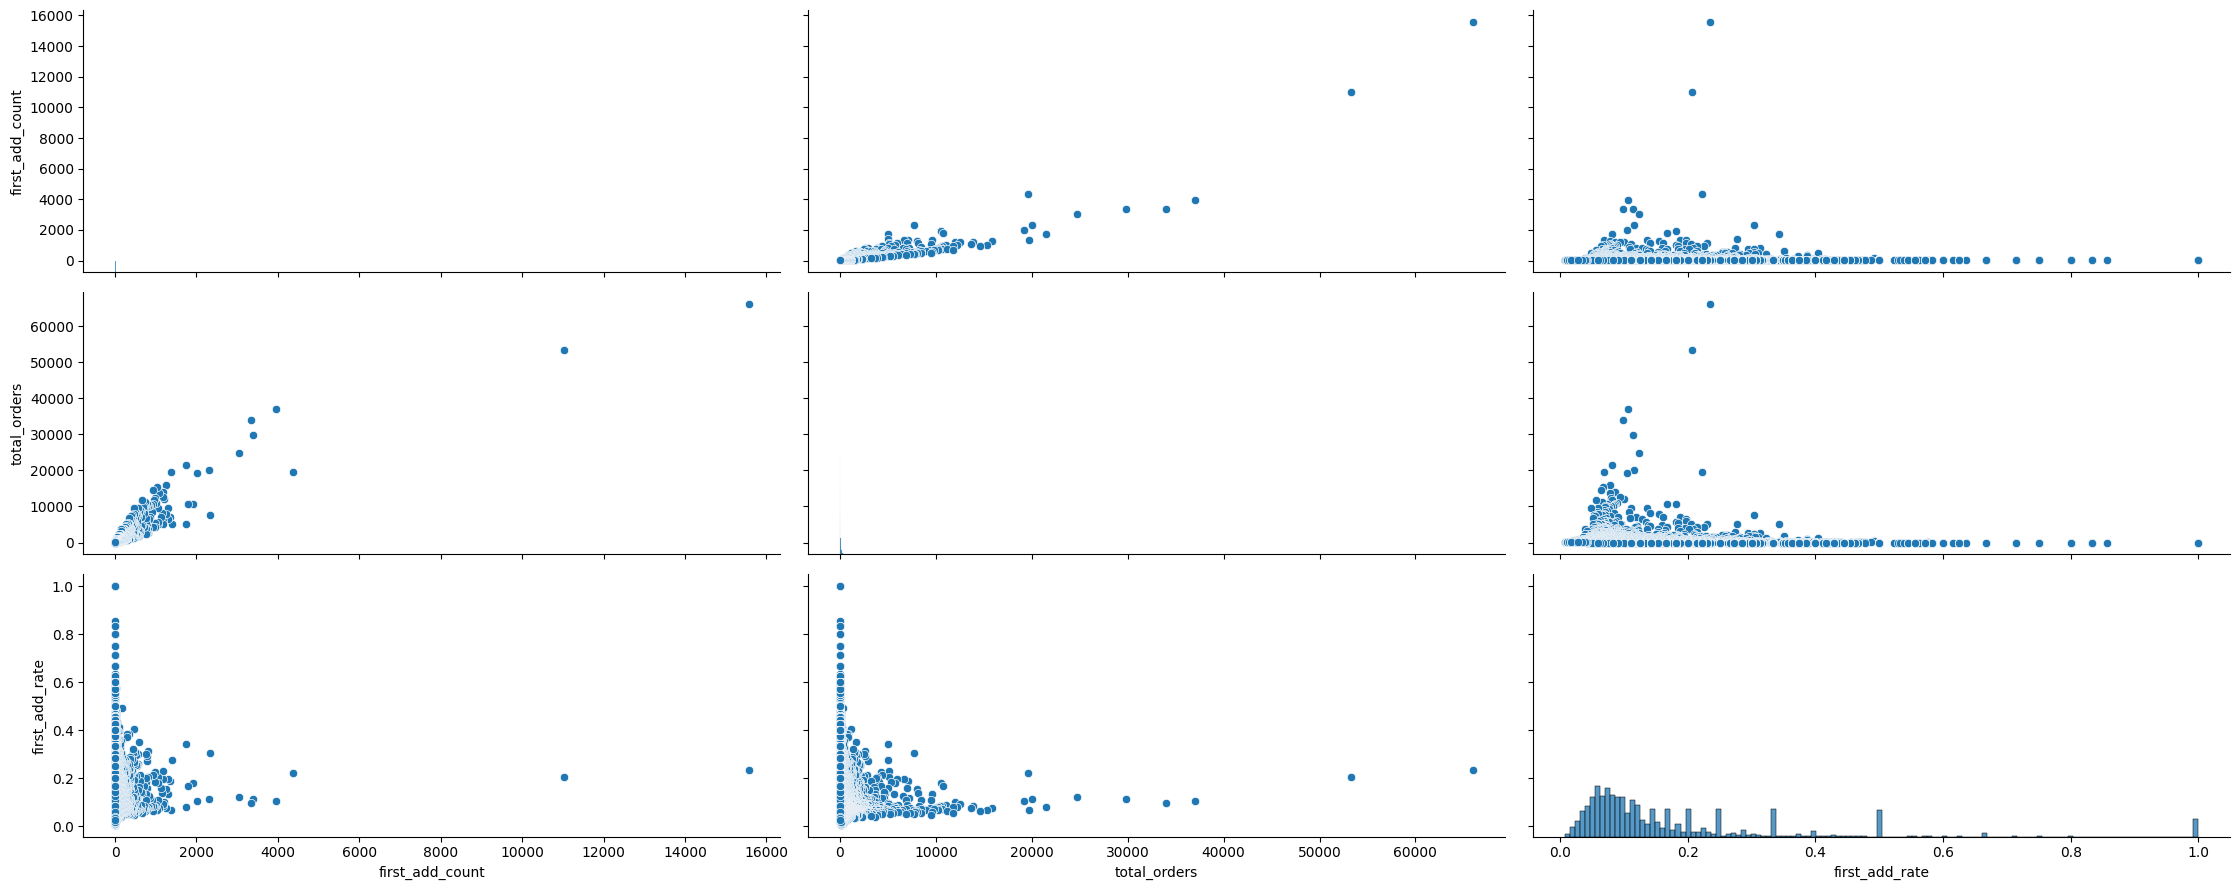

In [84]:
plot_pairplot(df_product_preference[['first_add_count', 'total_orders', 'first_add_rate']])

In [87]:
# Covariance for product reorder rate by position
df_product_reorder_rate_by_position[['add_to_cart_order', 'reorder_rate', 'product_count']].cov()

,add_to_cart_order,reorder_rate,product_count
add_to_cart_order,3.466667e+02,-1.098474,-1.741812e+06
reorder_rate,-1.098474e+00,0.005529,8.615280e+03
product_count,-1.741812e+06,8615.279687,1.463769e+10


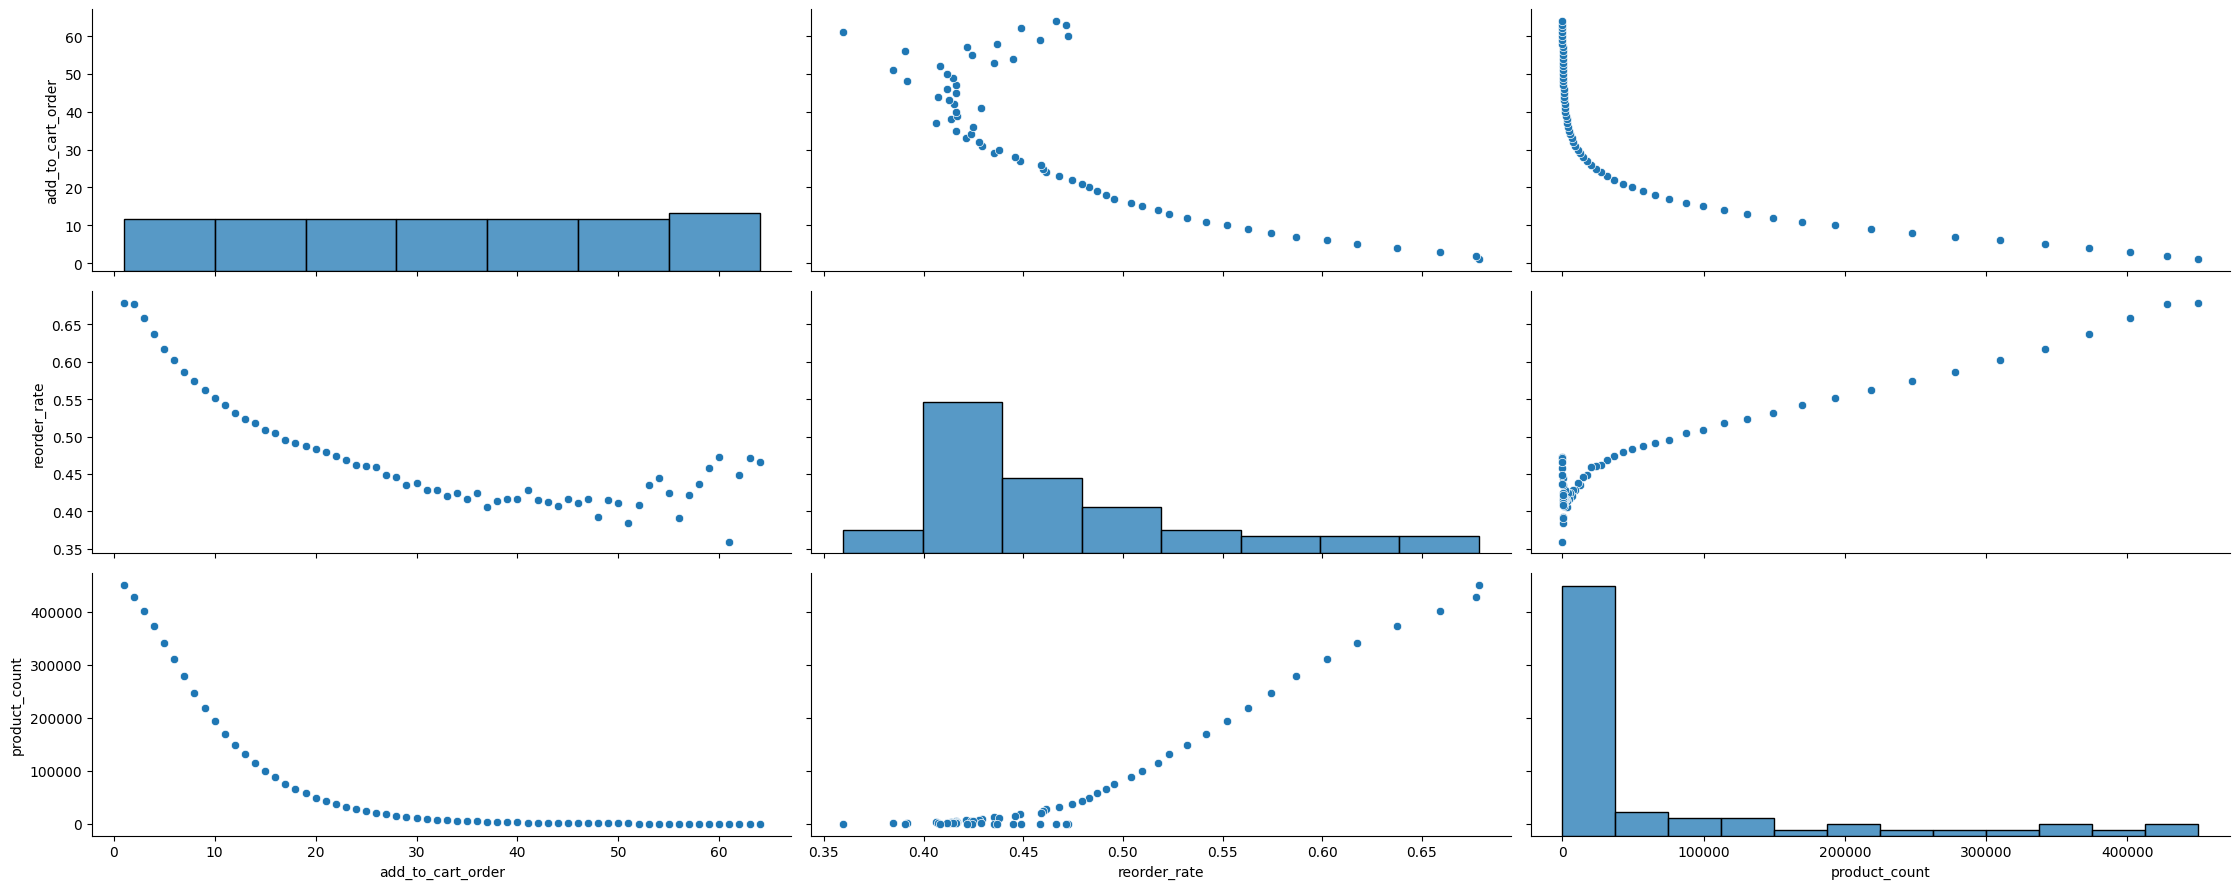

In [88]:
plot_pairplot(df_product_reorder_rate_by_position[['add_to_cart_order', 'reorder_rate', 'product_count']])

In [ ]:
# Covariance for product repurchase
df_product_repurchase[['add_to_cart_order', 'reorder_rate', 'product_count']].cov()

##### 3.2.1.2 Correlation Matrix

| Correlation Value     | Interpretation                |
| --------------------- | ----------------------------- |
| `+0.7` to `+1.0`      | Strong positive correlation   |
| `+0.3` to `+0.7`      | Moderate positive correlation |
| `0.0` to `+0.3`       | Weak positive correlation     |
| `0`                   | No correlation                |
| `-0.3` to `0`         | Weak negative correlation     |
| `-0.7` to `-0.3`      | Moderate negative correlation |
| `-1.0` to `-0.7`      | Strong negative correlation   |


In [ ]:
# Correlation for music activity per city and day
df_music_activity_city_day[['total_tracks', 'tracks', 'users']].corr()

In [ ]:
plot_scatter_matrix(df_music_activity_city_day[['total_tracks', 'tracks', 'users']])

In [ ]:
evaluate_correlation(df_music_activity_city_day[['total_tracks', 'tracks', 'users']])

In [ ]:
# Correlation for music activity per time, city and day
df_music_activity_time_city_day[['hour', 'total_tracks', 'tracks', 'users']].corr()

In [ ]:
plot_scatter_matrix(df_music_activity_time_city_day[['hour', 'total_tracks', 'tracks', 'users']])

In [ ]:
evaluate_correlation(df_music_activity_time_city_day[['hour', 'total_tracks', 'tracks', 'users']])

#### 3.2.2 Data visualization for Music Activity per City

In [ ]:
# Music Activity per City: Total Plays, Unique Tracks, and Unique Listeners
plot_grouped_bars_indx(df_music_activity_city, index_name='city', title='Music Activity per City', ylabel='Activity Count')

#### 3.2.3 Data visualization for Music Activity per day

In [ ]:
# Music Activity per Day: Total Plays, Unique Tracks, and Unique Listeners
plot_grouped_bars_indx(df_music_activity_day, index_name='day', title='Music Activity per Day', ylabel='Activity Count')

#### 3.2.4 Data visualization for Music Activity per City and Day

In [ ]:
df_music_activity_city_day = df_music_activity_city_day.set_index(['city', 'day'])
df_music_activity_city_day

In [ ]:
# Music Activity per City and Day: Total Plays, Unique Tracks, and Unique Listeners
plot_grouped_bars(df_music_activity_city_day, title='Music Activity per City and Day', ylabel='Activity Count')

#### 3.2.5 Data visualization for Music Activity per Time and City

In [ ]:
df_music_activity_time_city = df_music_activity_time_city.set_index(['city', 'hour'])
df_music_activity_time_city

In [ ]:
# Music Activity per Time and City: Total Plays, Unique Tracks, and Unique Listeners
plot_grouped_bars(df_music_activity_time_city, title='Music Activity per Time and City', ylabel='Activity Count', x_rotation=75)

#### 3.2.6 Data visualization for Music Activity per Time and Day

In [ ]:
df_music_activity_time_day = df_music_activity_time_day.set_index(['day', 'hour'])
df_music_activity_time_day

In [ ]:
# Music Activity per Time and Day: Total Plays, Unique Tracks, and Unique Listeners
plot_grouped_bars(df_music_activity_time_day, title='Music Activity per Time and Day', ylabel='Activity Count', x_rotation=75)

#### 3.2.7 Data visualization for Music Activity per Time, City and Day

In [ ]:
df_music_activity_time_city_day = df_music_activity_time_city_day.set_index(['city','day', 'hour'])
df_music_activity_time_city_day

In [ ]:
# Music Activity per Time , City and Day: Total Plays, Unique Tracks, and Unique Listeners
plot_grouped_bars(df_music_activity_time_city_day, title='Music Activity per Time, City and Day', ylabel='Activity Count', x_rotation=90)

## 4. Conclusions and key insights

This exploratory data analysis reveals several important insights into music activity across cities, days, and time periods:

### 🎯 Key Findings

- **User and Track Behavior Are Closely Correlated**:  
  Correlation analysis shows a strong linear relationship between the number of users and total tracks played, indicating usage intensity is fairly consistent across the user base.

- **High Variability Across Cities and Days**:  
  Coefficient of Variation (CV) highlights notable variability in activity patterns. Some cities show low variation, while others have high spikes or drops, suggesting possible influence of local trends or events.

- **Time of Day Impacts Engagement**:  
  Activity trends differ by time blocks, with clear peak hours visible in multiple visualizations. These can be valuable for targeting content or platform optimizations.

- **No Strong Outliers Detected**:  
  Most activity values fall within acceptable IQR thresholds. Where variation exists, it’s typically moderate and context-driven.

### 🧠 Conclusion: User Activity Patterns by Day and City

Analysis of user engagement across different cities and weekdays reveals clear behavioral differences. 

- Some cities show consistent activity throughout the week, while others experience significant peaks or drops on specific days.
- For example, **Springfield** exhibits higher activity on Fridays, suggesting end-of-week engagement, while **Shelbyville** remains more stable across weekdays.
- These trends may reflect local habits, promotional schedules, or platform usage preferences.
